In [129]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [3]:
df = pd.read_csv('spam.csv')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

# Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [10]:
df.rename(columns={'v1':'Target','v2':'text'},inplace=True)

In [11]:
df.sample(5)

,Target,text
991,ham,Hi im having the most relaxing time ever! we h...
2623,ham,I'm coming home 4 dinner.
3112,ham,"Wat time liao, where still got."
3619,ham,I meant as an apology from me for texting you ...
1524,ham,Hi:)cts employee how are you?


In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
enc = LabelEncoder() 

In [15]:
df['Target'] = enc.fit_transform(df['Target'])

In [16]:
df.head()

,Target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df.duplicated().sum()

402

In [21]:
df = df.drop_duplicates(keep='first')

In [22]:
df.duplicated().sum()

0

# EDA

In [24]:
df['Target'].value_counts()

0    4516
1     654
Name: Target, dtype: int64

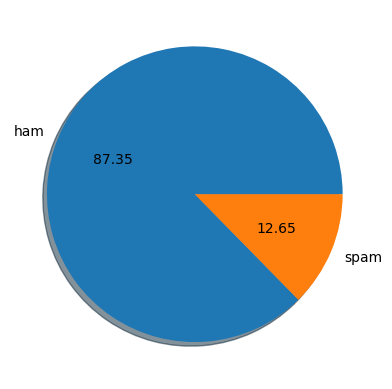

In [31]:
plt.pie(df['Target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [35]:
import nltk

In [36]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [37]:
#number of characters
df['characters'] = df['text'].apply(len)

In [38]:
df.head()

,Target,text,characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [46]:
#num of words
df['words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [42]:
df.head()

,Target,text,characters,words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [44]:
#num of sentences
df['sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [47]:
df.head()

,Target,text,characters,words,sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [50]:
df.describe()

,Target,characters,words,sentences
count,5170.000000,5170.000000,5170.000000,5170.000000
mean,0.126499,78.909091,18.593037,1.974855
std,0.332443,58.166683,13.395568,1.375710
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,2.000000
75%,0.000000,116.750000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [52]:
# for ham messages
df[df['Target']==0].describe()

,Target,characters,words,sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.423826,17.208813,1.828388
std,0.0,56.337586,13.525204,1.293822
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,28.000000


In [53]:
#for spam messages
df[df['Target']==1].describe()

,Target,characters,words,sentences
count,654.0,654.000000,654.000000,654.000000
mean,1.0,137.501529,28.151376,2.986239
std,0.0,30.006571,7.129733,1.494695
min,1.0,13.000000,2.000000,1.000000
25%,1.0,131.000000,25.000000,2.000000
50%,1.0,148.000000,29.000000,3.000000
75%,1.0,157.000000,33.000000,4.000000
max,1.0,223.000000,47.000000,8.000000


<AxesSubplot:xlabel='characters', ylabel='Count'>

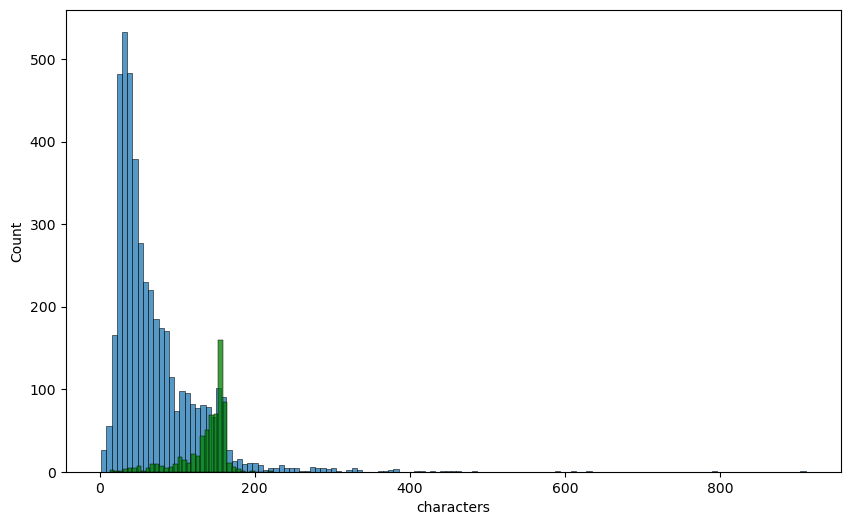

In [60]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['Target']==0]['characters'])
sns.histplot(df[df['Target']==1]['characters'],color='green')

<AxesSubplot:xlabel='words', ylabel='Count'>

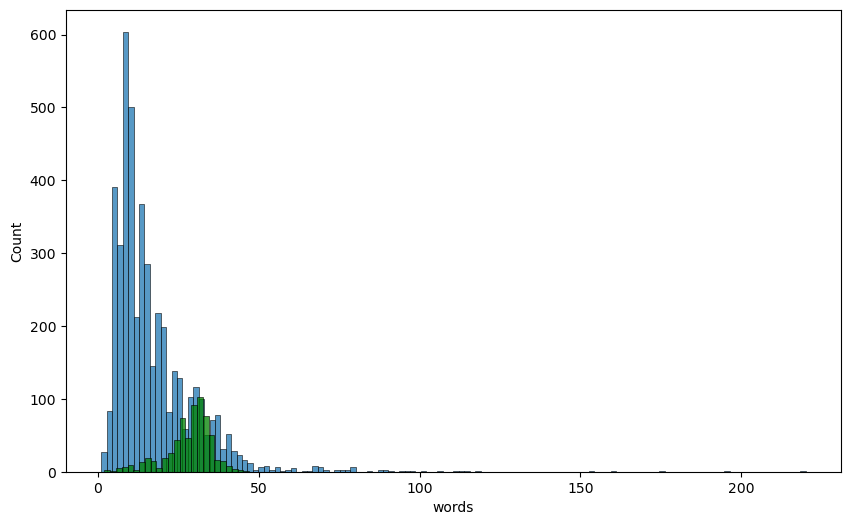

In [61]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['Target']==0]['words'])
sns.histplot(df[df['Target']==1]['words'],color='green')

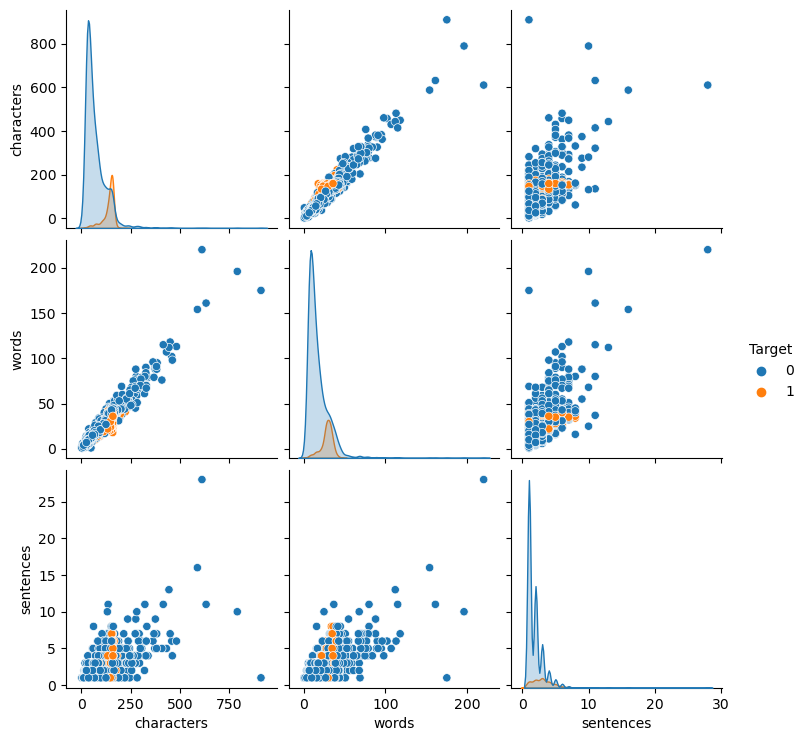

In [62]:
sns.pairplot(df,hue='Target')

<AxesSubplot:>

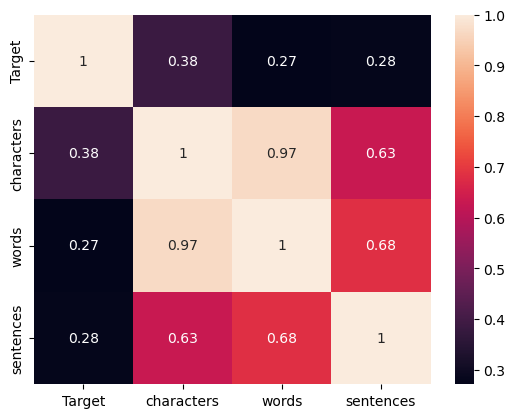

In [63]:
sns.heatmap(df.corr(),annot=True)

# Data Preprocessing

- Lower Case
- Tokenization
- Removing Special Characters
- Removing punctuations
- Stemming

In [85]:
from nltk.corpus import stopwords
import string

In [88]:
from nltk.stem.porter import PorterStemmer

In [91]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)

In [95]:
transform_text('I went to a watch a match no.#30 , i enjoyed alot')

'went watch match 30 enjoy alot'

In [97]:
df['transformed_text'] = df['text'].apply(transform_text)

In [98]:
df.head()

,Target,text,characters,words,sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [107]:
from wordcloud import WordCloud
wc = WordCloud(width=600,height=600,min_font_size=10,background_color="white")

In [108]:
spam_wc = wc.generate(df[df['Target']==1]['transformed_text'].str.cat(sep=" "))

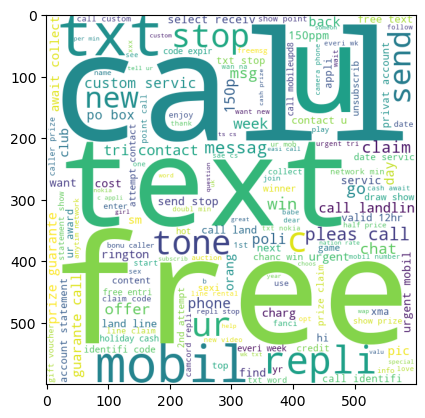

In [109]:
plt.imshow(spam_wc)

In [110]:
ham_wc = wc.generate(df[df['Target']==0]['transformed_text'].str.cat(sep=" "))

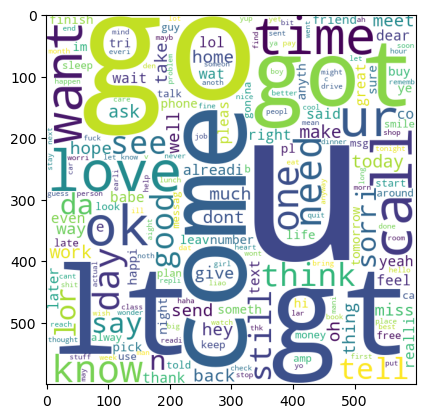

In [111]:
plt.imshow(ham_wc)

In [114]:
spam_list = []
for msg in df[df['Target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_list.append(word)

In [116]:
len(spam_list)

10168

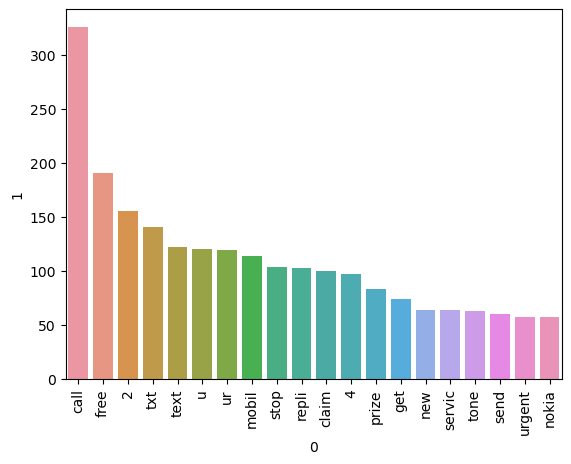

In [121]:
from collections import Counter
sns.barplot(x= pd.DataFrame(Counter(spam_list).most_common(20))[0],y= pd.DataFrame(Counter(spam_list).most_common(20))[1])
plt.xticks(rotation='vertical')
plt.show()

In [124]:
ham_list = []

for msg in df[df['Target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_list.append(word)

In [125]:
len(ham_list)

35333

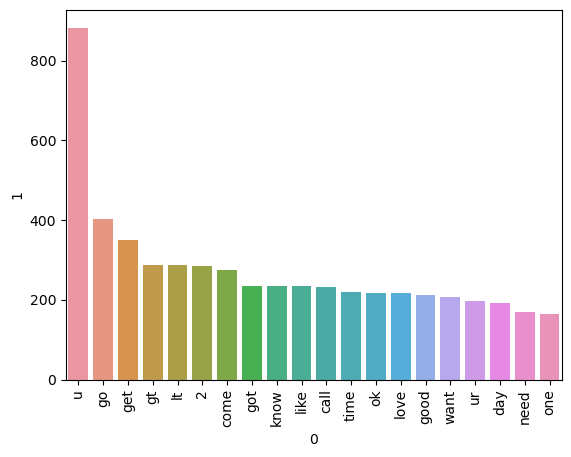

In [128]:
sns.barplot(x=pd.DataFrame(Counter(ham_list).most_common(20))[0],y=pd.DataFrame(Counter(ham_list).most_common(20))[1])
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [229]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=4000)

In [230]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [231]:
X.shape

(5170, 4000)

In [180]:
y = df['Target'].values

In [181]:
y.shape

(5170,)

In [232]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [233]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [234]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [235]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)

In [236]:
print("GaussianNB")
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

GaussianNB
0.8597678916827853
[[774 120]
 [ 25 115]]
0.48936170212765956


In [237]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print("MultinomialNB")
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

MultinomialNB
0.9661508704061895
[[894   0]
 [ 35 105]]
1.0


In [238]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print("BernoulliNB")
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

BernoulliNB
0.9787234042553191
[[894   0]
 [ 22 118]]
1.0


In [239]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(bnb,open('model.pkl','wb'))